# Data

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
df_bp = pd.read_csv("oscars_final.csv")

df_bp = df_bp.drop(columns=['Unnamed: 0'])
df_bp.dropna(subset=["imdb_rating", "rt_critic", "rt_audience"], inplace=True)
df_bp.reset_index(drop=True, inplace=True)

df_bp = df_bp[:-10]

df_bp

,year_film,year_ceremony,ceremony,category,name,film,winner,total_noms,runtime,director,...,gg_drama_nom,gg_drama_win,gg_comedy_nom,gg_comedy_win,rt_critic,rt_audience,pga_nom,pga_win,ccma_nom,ccma_win
0,1927,1928,1,OUTSTANDING PICTURE,Fox,7th Heaven,False,5.0,110,Frank Borzage,...,0.0,0.0,0.0,0.0,100.0,84.0,0.0,0.0,0.0,0.0
1,1927,1928,1,OUTSTANDING PICTURE,The Caddo Company,The Racket,False,1.0,84,Lewis Milestone,...,0.0,0.0,0.0,0.0,100.0,69.0,0.0,0.0,0.0,0.0
2,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True,2.0,144,"William A. Wellman, Harry d'Abbadie d'Arrast",...,0.0,0.0,0.0,0.0,94.0,79.0,0.0,0.0,0.0,0.0
3,1928,1929,2,OUTSTANDING PICTURE,Fox,In Old Arizona,False,4.0,95,"Irving Cummings, Raoul Walsh",...,0.0,0.0,0.0,0.0,56.0,35.0,0.0,0.0,0.0,0.0
4,1928,1929,2,OUTSTANDING PICTURE,Feature Productions,Alibi,False,2.0,91,Roland West,...,0.0,0.0,0.0,0.0,56.0,35.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2022,2023,95,BEST PICTURE,"Daniel Kwan, Daniel Scheinert and Jonathan Wan...",Everything Everywhere All at Once,True,11.0,139,"Daniel Kwan, Daniel Scheinert",...,0.0,0.0,1.0,0.0,94.0,86.0,1.0,1.0,1.0,1.0
581,2022,2023,95,BEST PICTURE,"Todd Field, Alexandra Milchan and Scott Lamber...",Tár,False,6.0,158,Todd Field,...,1.0,0.0,0.0,0.0,91.0,74.0,1.0,0.0,1.0,0.0
582,2022,2023,95,BEST PICTURE,"Tom Cruise, Christopher McQuarrie, David Ellis...",Top Gun: Maverick,False,6.0,130,Joseph Kosinski,...,1.0,0.0,0.0,0.0,96.0,99.0,1.0,0.0,1.0,0.0
583,2022,2023,95,BEST PICTURE,"Dede Gardner, Jeremy Kleiner and Frances McDor...",Women Talking,False,2.0,104,Sarah Polley,...,0.0,0.0,0.0,0.0,90.0,80.0,0.0,0.0,1.0,0.0


# Visuals

## Total Nominations

This histogram visualizes the distribution of total nominations for films, differentiating between winners and non-winners of the best picture category.

In [ ]:
import plotly.express as px

fig = px.histogram(df_bp,
                   x="total_noms",
                   color="winner",
                   nbins=20,
                   title="Distribution of Total Nominations by Best Picture Winner Status",
                   labels={"total_noms": "Total Nominations", "winner": "Best Picture Winner"},
                   opacity=0.7,
                   barmode="overlay",
                   histnorm='percent')

fig.show()

Based on the graph above, the films that did not win has a lighly skewed right plot where as the films that did win has a lightly skewed left plot. Therefore, it looks like the more Oscar nominations a film has, the more likely it is to win Best Picture.

## Genres

This stacked bar chart allows you to compare the distribution of genres for movies that won or did not win the best picture category. You can easily observe which genres are more prevalent among winners and how the distribution varies across different genres.

In [ ]:
df_genre = df_bp.groupby("winner")[['genre_drama','genre_romance', 'genre_war', 'genre_crime',
                                    'genre_film-noir', 'genre_musical', 'genre_action', 'genre_comedy',
                                    'genre_music', 'genre_western', 'genre_history', 'genre_thriller',
                                    'genre_biography', 'genre_family', 'genre_adventure', 'genre_sport',
                                    'genre_mystery', 'genre_fantasy', 'genre_sci-fi', 'genre_horror',
                                    'genre_animation']].sum()

df_genre = df_genre.T.reset_index()
df_genre.columns = ['genre', 'false', 'true']
df_genre = pd.melt(df_genre, id_vars=['genre'], var_name='winner', value_name='count')

total_count_per_genre = df_genre.groupby('genre')['count'].transform('sum')
df_genre['normalized_count'] = df_genre['count'] / total_count_per_genre

df_genre.sort_values(by='count', ascending=False, inplace=True)
not_normalized = px.bar(df_genre,
                        x='genre',
                        y='count',
                        color='winner',
                        title='Distribution of Genres by Best Picture Winner Status',
                        labels={'genre': 'Genre', 'count': 'Count', 'winner': 'Best Picture Winner'})

df_genre.sort_values(by='normalized_count', ascending=False, inplace=True)
normalized = px.bar(df_genre,
                    x='genre',
                    y='normalized_count',
                    color='winner',
                    title='Distribution of Genres by Best Picture Winner Status',
                    labels={'genre': 'Genre', 'normalized_count': 'Proportion', 'winner': 'Best Picture Winner'})

not_normalized.show()
normalized.show()

Based on the graphs above it looks like the top three genres that are mostly to win Best Picture if they are nominated are war, musicals, sport. However, that does not mean that these genres get nominated the most. The top three genres that get nominated the most are drama, romance, and comedy.



## Certificates

This stack bar chart allows you to compare the distribution of certifications for movies that won or did not win the best picture category. You can easily observe which certifications are more prevalent among winners and how the distribution varies across different certifications.



In [ ]:
df_certificate = df_bp.groupby("winner")[['certificate_pg-13', 'certificate_passed', 'certificate_not_rated',
                                          'certificate_approved', 'certificate_tv-pg',
                                          'certificate_g', 'certificate_pg', 'certificate_tv-ma', 'certificate_r',
                                          'certificate_m/pg', 'certificate_gp']].sum()


df_certificate = df_certificate.T.reset_index()
df_certificate.columns = ['certificate', 'false', 'true']
df_certificate = pd.melt(df_certificate, id_vars=['certificate'], var_name='winner', value_name='count')
df_certificate

total_count_per_certificate = df_certificate.groupby('certificate')['count'].transform('sum')
df_certificate['normalized_count'] = df_certificate['count'] / total_count_per_certificate

df_certificate.sort_values(by='count', ascending=False, inplace=True)
not_normalized = px.bar(df_certificate,
                        x='certificate',
                        y='count',
                        color='winner',
                        title='Distribution of Certificates by Best Picture Winner Status',
                        labels={'certificate': 'Certificate', 'count': 'Count', 'winner': 'Best Picture Winner'})

df_certificate.sort_values(by='normalized_count', ascending=False, inplace=True)
normalized = px.bar(df_certificate,
                    x='certificate',
                    y='normalized_count',
                    color='winner',
                    title='Distribution of Certificates by Best Picture Winner Status',
                    labels={'certificate': 'Certificate', 'normalized_count': 'Proportion', 'winner': 'Best Picture Winner'})

not_normalized.show()
normalized.show()

Based on the graph above it looks like the top three certificates that are mostly likely to win Best Picture if they are nominated are g, r, gp. However, that does not mean that these certificates get nominated the most. The top three certificates that get nominated the most are r, passed, and pg-13.


## IMDb Ratings

This line chart shows the average IMDb ratings over the years. Each line in the charts represents a different winner status for best picture. The chart provides a visual representation of how the average IMDb ratings have varied over the years, distinguishing between films that did win or did not win best picture.

In [ ]:
df_aggregated = df_bp.groupby(['year_ceremony', 'winner']).agg({'imdb_rating': 'mean'}).reset_index()

px.line(df_aggregated, x='year_ceremony', y='imdb_rating', color='winner', markers=True,
        title='Distribution of Average IMDb Ratings by Best Picture Winner Status',
        labels={'imdb_rating': 'Average IMDb Rating', 'year_ceremony': 'Year', 'winner': 'Best Picture Winner'})

Based on the graph, it looks like there is not really a general pattern. However, it seems like the films that won Best Picture tend to have higher IMDb rating than the movies that lost. There are a few scores for films that won that have significanlt low scores.

## Rotten Tomato Ratings

There are two line charts below, one showing the average Rotten Tomato critic ratings and the other showing the average Rotten Tomato audience ratings over the years. Each line in the charts represents a different winner status for best picture. These charts provide a visual representation of how the average critic and audience ratings have varied over the years, distinguishing between films that did win or did not win best picture.

In [ ]:
df_aggregated = df_bp.groupby(['year_ceremony', 'winner']).agg({'rt_critic': 'mean', 'rt_audience': 'mean'}).reset_index()

critic = px.line(df_aggregated, x='year_ceremony', y='rt_critic', color='winner', markers=True,
                 title='Distribution of Average Rotten Tomato Critic Ratings by Best Picture Winner Status',
                 labels={'rt_critic': 'Average Rotten Tomato Critic Rating', 'year_ceremony': 'Year', 'winner': 'Best Picture Winner'})

audience = px.line(df_aggregated, x='year_ceremony', y='rt_audience', color='winner', markers=True,
                   title='Distribution of Average Rotten Tomato Audience Ratings by Best Picture Winner Status',
                   labels={'rt_audience': 'Average Rotten Tomato Audience Rating', 'year_ceremony': 'Year', 'winner': 'Best Picture Winner'})

critic.show()
audience.show()

Based on the two graphs, it looks like there is not really a general pattern. However, it seems like the films that won Best Picture tend to have higher Rotten Tomato ratings for both critics and audience than the movies that lost. There are a few scores for films that won that have significanlt low scores.

## Other Awards

This grouped bar chart visually separates the counts of 0 and 1 for each award category, making it easier to compare the number of nominations and wins across different awards. The data is grouped into two different charts based on best picture winner status, allowing you to compare the relationship for winners and non-winners separately.

In [ ]:
df_other_awards = df_bp[['film', 'bafta_nom', 'bafta_win',
                         'gg_drama_nom', 'gg_drama_win',
                         'gg_comedy_nom', 'gg_comedy_win',
                         'pga_nom', 'pga_win',
                         'ccma_nom', 'ccma_win', 'winner']]

df_other_awards = df_other_awards.melt(id_vars=['film', 'winner'], var_name='other_awards', value_name='status')
df_other_awards = df_other_awards.groupby(['other_awards', 'status', 'winner']).size().reset_index(name='count')

total_films_per_award = df_other_awards.groupby('other_awards')['count'].transform('sum')
df_other_awards['normalized_count'] = df_other_awards['count'] / total_films_per_award

df_other_awards.sort_values(by="normalized_count", ascending=False, inplace=True)
px.bar(df_other_awards,
       x='other_awards',
       y='normalized_count',
       color='status',
       facet_col='winner',
       barmode='group',
       title='Distribution of Other Awards Nominations and Wins by Best Picture Winner Status',
       labels={'status': 'Status', 'other_awards': 'Other Awards', 'normalized_count': 'Proportion', "winner": "Best Picture Winner"})

Based on the graph, it looks like being nominated for a BAFTA or Golden Globe award both results in the most losses and wins.

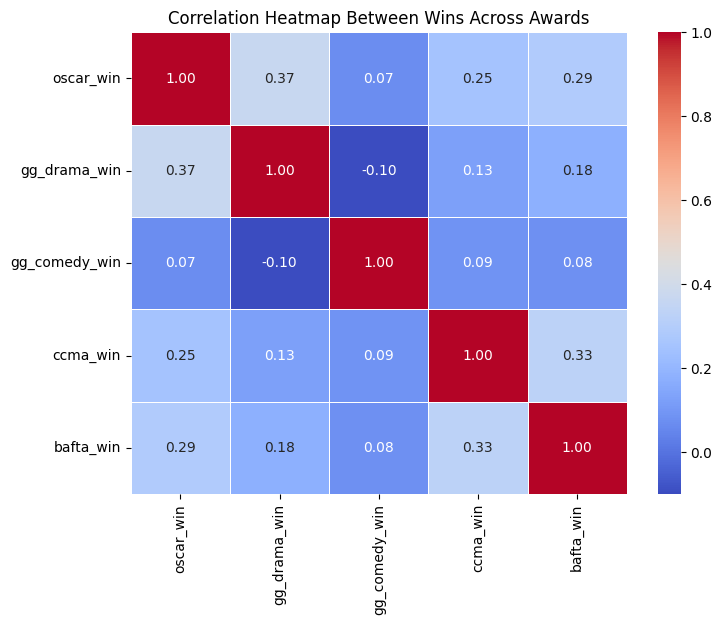

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_bp
df['oscar_win'] = df['winner'].apply(lambda x: 1 if x else 0)

# Focus on columns related to wins in the Golden Globes, CCMA, and Oscars
wins_columns = ['oscar_win', 'gg_drama_win', 'gg_comedy_win', 'ccma_win', 'bafta_win']

# Calculate the correlation matrix for these wins
wins_correlation_data = df[wins_columns].corr()

# Plotting the heatmap for the wins correlations
plt.figure(figsize=(8, 6))
sns.heatmap(wins_correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap Between Wins Across Awards')

plt.show()

## Best Director Nomination

In [ ]:
df_director = df_bp.groupby(['winner', 'best_director_nom'])['best_director_nom'].size().reset_index(name='count')

total_films_per_director = df_director.groupby('best_director_nom')['count'].transform('sum')
df_director['normalized_count'] = df_director['count'] / total_films_per_director

not_normalized = px.bar(df_director,
                        x='best_director_nom',
                        y='count',
                        color='winner',
                        title='Distribution of Nomination for Best Director by Best Picture Winner Status',
                        labels={'best_director_nom': 'Director Nominated for Best Director', 'winner': 'Best Picture Winner', 'count': 'Count'})

normalized = px.bar(df_director,
                    x='best_director_nom',
                    y='normalized_count',
                    color='winner',
                    title='Distribution of Nomination for Best Director by Best Picture Winner Status',
                    labels={'best_director_nom': 'Director Nominated for Best Director', 'winner': 'Best Picture Winner', 'normalized_count': 'Proportion'})

not_normalized.show()
normalized.show()

Based on the graph, it looks like a film is mostly likely to win Best Picture if the director of the film is also nominated for Best Director. Most of the time, the director of the films nominated are also nominated for Best Director.